## Observations and Insights 

In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np #this was not included in starter code

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how= "outer", on="Mouse ID")
# Display the data table for preview

combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [215]:
# Checking the number of mice.
total_mice = len(combined_df)
total_mice

1893

In [216]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint = combined_df.loc[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_mice_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [232]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = combined_df.loc[combined_df['Mouse ID']== "g989"]
duplicate_mice_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [234]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df['Mouse ID'] != "g989",:] #,: gives all rows and columns 
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [461]:
# Checking the number of mice in the clean DataFrame.
unique_mice = cleaned_df.drop_duplicates(subset = ['Mouse ID'])
len(unique_mice)

248

## Summary Statistics

In [236]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()



In [237]:
# Assemble the resulting series into a single summary dataframe.

sum_statistics_table = pd.DataFrame({'Mean of Tumor Volume' : mean, "Median of Tumor Volume": median, 'Variance of Tumor Volume' : variance, 
                                     'Standard Deviation of Tumor Volume' : stdev, 'SEM of Tumor Volume' : sem})
sum_statistics_table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_statistics_table

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_table = cleaned_df.groupby("Drug Regimen").aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'var', 'sem']})
aggregate_table

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

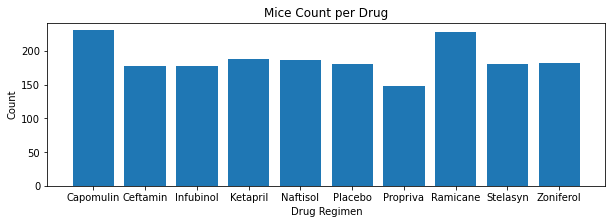

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [324]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_name = cleaned_df.groupby('Drug Regimen')
mice_per_drug = cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()

plt.figure(figsize=(10,3))
plt.bar(mice_per_drug.index, mice_per_drug)

plt.title("Mice Count per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")



plt.show()
mice_per_drug

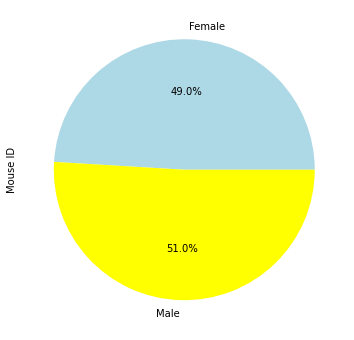

pandas.core.series.Series

In [300]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female = cleaned_df[['Mouse ID', 'Sex']]
count_of_sex = male_vs_female.groupby('Sex')['Mouse ID'].count()

count_of_sex.plot(kind = "pie", figsize = (12,6), autopct='%1.1f%%', colors = ["lightblue",  "yellow"])
plt.show()

type (count_of_sex)

Text(0.5, 1.0, 'Mice Count per Drug')

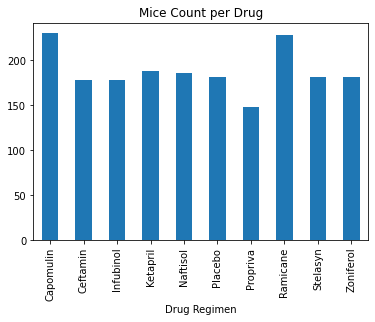

In [279]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

mice_per_drug.plot(kind = "bar")
plt.title("Mice Count per Drug")

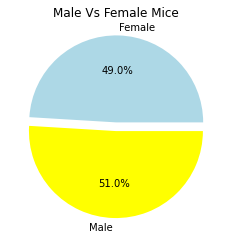

In [303]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
explode = (0.1, 0)
colors = ["lightblue", "yellow"]
plt.pie(count_of_sex, labels = labels, explode = explode, colors = colors, autopct='%1.1f%%' )

plt.title("Male Vs Female Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [323]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Capomulin']
last_timepoint_Capomulin = Capomulin_df.groupby('Mouse ID').max()['Timepoint']

Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Ramicane']
last_timepoint_Ramicane = Ramicane_df.groupby('Mouse ID').max()['Timepoint']


Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Infubinol']
last_timepoint_Infubinol = Infubinol_df.groupby('Mouse ID').max()["Timepoint"]

Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Ceftamin']
last_timepoint_Ceftamin = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']



Mouse ID
a275    45
b447     0
b487    25
b759    30
f436    15
h531     5
j296    45
k210    45
l471    45
l490    30
l558    10
l661    45
l733    45
o287    45
p438    45
q483    40
t573     0
u149    25
u153     0
w151    45
x226     0
x581    45
x822    45
y769    45
y865    45
Name: Timepoint, dtype: int64

In [350]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_timepoint_df = pd.DataFrame(last_timepoint_Capomulin)

Capomulin_merged = pd.merge(cleaned_df, Capomulin_timepoint_df, how = 'inner', on = ['Timepoint', 'Mouse ID'])

Capomulin_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,45,23.343598,1
1,x401,Capomulin,Female,16,15,45,28.484033,0
2,m601,Capomulin,Male,22,17,45,28.430964,1
3,f966,Capomulin,Male,16,17,20,30.485985,0
4,u364,Capomulin,Male,18,17,45,31.023923,3


In [352]:
Ramicane_timepoint_df = pd.DataFrame(last_timepoint_Ramicane)

Ramicane_merged = pd.merge(cleaned_df, Ramicane_timepoint_df, how = 'inner', on = ['Timepoint', 'Mouse ID'])
Ramicane_merged.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0


In [354]:
Infubinol_timepoint_df = pd.DataFrame(last_timepoint_Infubinol)

Infubinol_merged = pd.merge(cleaned_df, Infubinol_timepoint_df, how = 'inner', on = ['Timepoint', 'Mouse ID'])
Infubinol_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a577,Infubinol,Female,6,25,30,57.031862,2
3,a685,Infubinol,Male,8,30,45,66.083066,3
4,c139,Infubinol,Male,11,28,45,72.226731,2


In [357]:
Ceftamin_timepoint_df = pd.DataFrame(last_timepoint_Ceftamin)

Ceftamin_merged = pd.merge(cleaned_df, Ceftamin_timepoint_df, how = 'inner', on = ['Timepoint', 'Mouse ID'])
Ceftamin_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a275,Ceftamin,Female,20,28,45,62.999356,3
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,b487,Ceftamin,Female,6,28,25,56.057749,1
3,b759,Ceftamin,Female,12,25,30,55.742829,1
4,f436,Ceftamin,Female,3,25,15,48.722078,2


In [464]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Ceftamin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == treatment]
    tumor_volume_list.append(treatment_df["Tumor Volume (mm3)"])
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_quartile = quartiles[.25]
    
    upper_quartile = quartiles[.75]
    print(f'The lower quartile is {round(lower_quartile, 2)}\n')
    print(f'The upper quartile is {round(upper_quartile, 2)}\n')
    
    #IQR is upper - lower 
    
    iqr = upper_quartile - lower_quartile
    
    #lower bound and upper bound
    lower_bound = lower_quartile -(1.5* iqr)
    upper_bound = upper_quartile + (1.5* iqr)
    print(f'The lower bound is {round(lower_bound, 2)}\n')
    print(f'The upper bound is {round(upper_bound, 2)}\n')
    
    #outliers 
    outliers = treatment_df.loc[(treatment_df["Tumor Volume (mm3)"]<lower_bound) | (treatment_df["Tumor Volume (mm3)"]>upper_bound)]
    print(f' the outliers are {round(outliers)}\n')

The lower quartile is 47.21

The upper quartile is 56.8

The lower bound is 32.82

The upper bound is 71.19

 the outliers are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

The lower quartile is 36.67

The upper quartile is 45.0

The lower bound is 24.19

The upper bound is 57.49

 the outliers are   Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
9     k403     Ramicane  Male          21          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
9                22.0                 1  

The lower quartile is 47.31

The upper quartile is 57.31

The lower bound is 32.31

The upper bound is 72.32

 the outliers are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []

The lower quartile is 47.21

The upper quartile is 56.8

The lower bound is 32.82

The upper bound is 71.19

 the outl

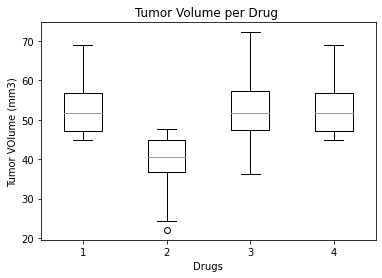

In [468]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Drug ')
ax1.set_ylabel('Tumor VOlume (mm3)')
ax1.set_xlabel('Drugs')
ax1.boxplot(tumor_volume_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

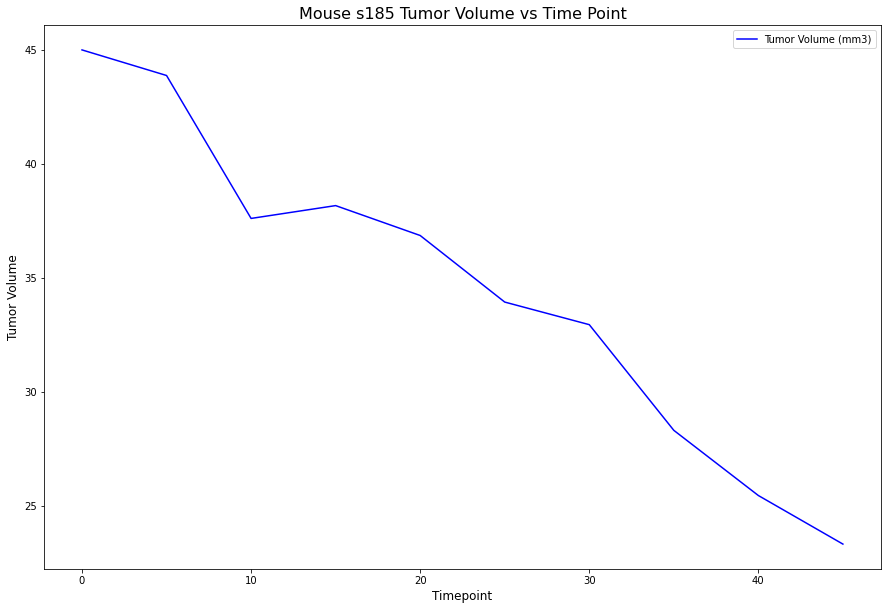

In [415]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin - mouse s185

Capomulin_plot_df = Capomulin_df.loc[ Capomulin_df['Mouse ID'] == "s185"]
Capomulin_plot_df = Capomulin_plot_df[['Timepoint', 'Tumor Volume (mm3)']]
Capomulin_plot_df = Capomulin_plot_df.set_index("Timepoint")
Capomulin_plot_df.plot(kind = "line", color = "blue", figsize = (15,10))
plt.title("Mouse s185 Tumor Volume vs Time Point", fontsize = 16)
plt.xlabel("Timepoint", fontsize = 12)
plt.ylabel("Tumor Volume", fontsize = 12)

<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

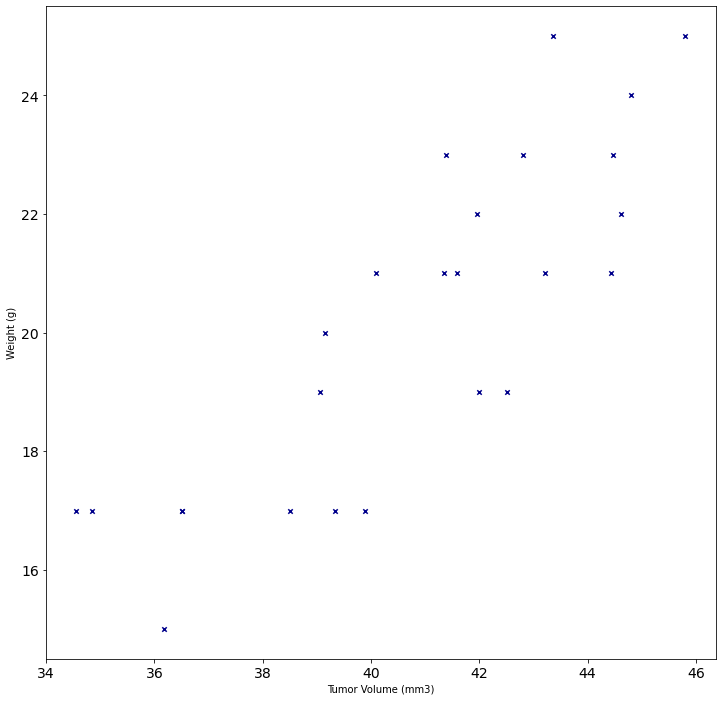

In [480]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumor_cap = Capomulin_df.groupby('Mouse ID').mean()
avg_tumor_cap = avg_tumor_cap[["Weight (g)","Tumor Volume (mm3)"]]

#each ploint on the graph represents 1 mouse and their average weight and tumor volume at their average timepoint

avg_tumor_cap.plot.scatter( x = "Tumor Volume (mm3)", y = "Weight (g)" , figsize =  (12,12), 
                             color = "darkblue", fontsize = 14, marker = 'x' )


## Correlation and Regression

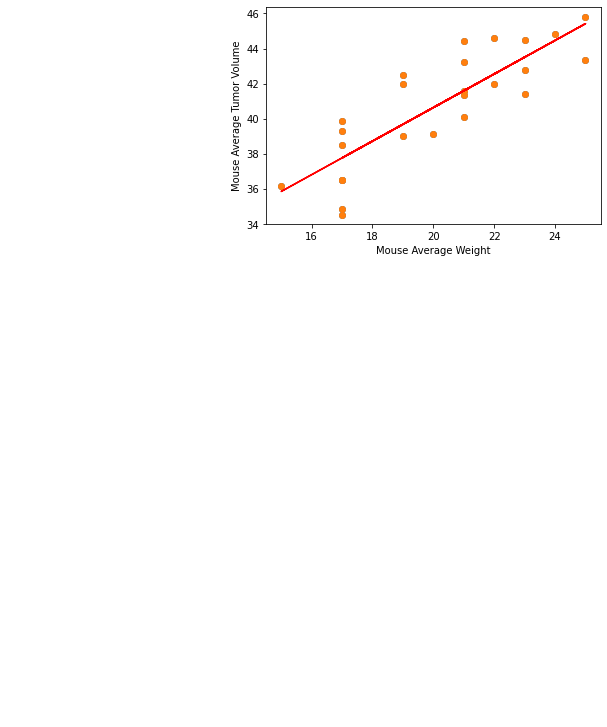

In [496]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen - since its askiogn average vol and weight can use the dataframe from above
from scipy.stats import linregress

fig, ax = plt.subplots()

x_values = avg_tumor_cap['Weight (g)']
y_values = avg_tumor_cap['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel("Mouse Average Weight")
plt.ylabel("Mouse Average Tumor Volume")

#add regression line

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
slope_eq = f'y = {round(slope),2}x + {round(intercept),2}'
plt.annotate(slope_eq,(6,6),fontsize=12,color="red")
plt.show()


In [500]:
# Calculate the correlation coefficient between the average weight (x_values) of the mouse and their tumor volume (y_values) while on Capomulin
average_weight = x_values
average_tumor_volume = y_values

correlation = st.pearsonr(average_weight,average_tumor_volume)
print(f' The correlation coefficient is {round(correlation[0],2)}')

 The correlation coefficient is 0.84
